<a href="https://colab.research.google.com/github/Alanb161/UAV-Performance-Analysis/blob/main/UAV_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ALGORITMO DE AUTOMATIZAÇÃO DE CÁLCULOS DE ANÁLISE DE DESEMPENHO**
---

SETUP
---

In [ ]:
!pip install --upgrade gspread
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

import math as math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from termcolor import colored

IMPORTANDO DADOS DA POLAR DE ARRASTO

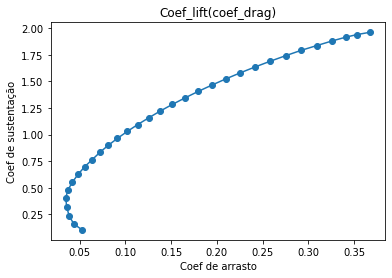

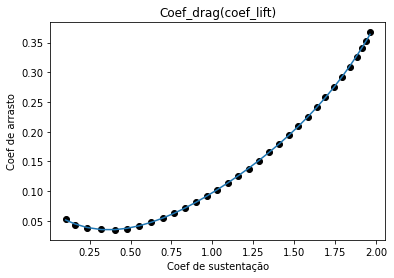

Text(0.5, 0, 'Alpha')

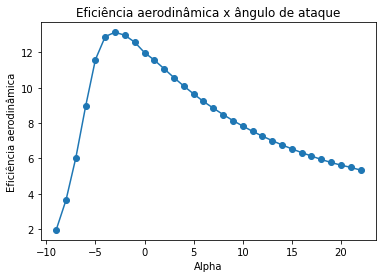

In [ ]:
polar = pd.read_csv('Polar_arrasto_Bizao.csv')
coef_drag = np.array(polar.iloc[:32, 1])
coef_drag = coef_drag.reshape(-1,1)
coef_lift = np.array(polar.iloc[:32, 2])
coef_lift = coef_lift.reshape(-1, 1)

poly_reg1 = PolynomialFeatures(degree = 5)
coef_lift_poly = poly_reg1.fit_transform(coef_lift)
lin_reg_polar = LinearRegression()
lin_reg_polar.fit(coef_lift_poly, coef_drag)

plt.scatter(coef_drag, coef_lift)
plt.plot(coef_drag, coef_lift)
plt.title('Coef_lift(coef_drag)')
plt.ylabel('Coef de sustentação')
plt.xlabel('Coef de arrasto')
plt.show()

print('==========================================================')

plt.scatter(coef_lift, coef_drag, color = 'black')
plt.plot(coef_lift, lin_reg_polar.predict(poly_reg1.fit_transform(coef_lift)))
plt.title('Coef_drag(coef_lift)')
plt.ylabel('Coef de arrasto')
plt.xlabel('Coef de sustentação')
plt.show()

alpha = np.array(polar.iloc[:32, 0])
aero_eff = coef_lift/coef_drag
plt.scatter(alpha, aero_eff)
plt.plot(alpha, aero_eff)
plt.title("Eficiência aerodinâmica x ângulo de ataque")
plt.ylabel("Eficiência aerodinâmica")
plt.xlabel("Alpha")

IMPORTANDO DADOS DE TRAÇÃO DISPONÍVEL

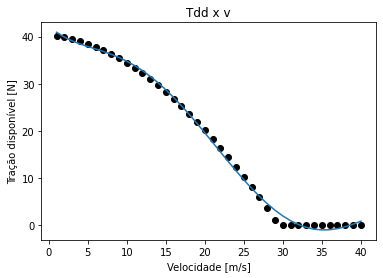

In [ ]:
dataset = pd.read_csv('helice_td - 20x15.csv')
v = np.array(dataset.iloc[:, 0])
v = v.reshape(-1,1)
Tdd = np.array(dataset.iloc[:, -1])
Tdd = Tdd.reshape(-1, 1)

poly_reg = PolynomialFeatures(degree = 5)
v_poly = poly_reg.fit_transform(v)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(v_poly, Tdd)

plt.scatter(v, Tdd, color = 'black')
plt.plot(v, lin_reg_2.predict(poly_reg.fit_transform(v)))
plt.title('Tdd x v')
plt.ylabel('Tração disponível [N]')
plt.xlabel('Velocidade [m/s]')
plt.show()

INPUTS QUE DEVEM SER INSERIDOS PELO USUÁRIO

In [ ]:
#Inputs manuais
CL = 1.15958
CD = 0.0854575
S = 0.952
CLmax = 1.32
b = 2.5
h = 0.135
phi = ((16*(h/b))**2)/(1+(16*(h/b))**2)
CDge = CD*phi
g = 9.77
dens = 1.074471
mi = 0.03 
hcru = 800
hclimb = 60

MTOW E DESEMPENHO DE DECOLAGEM
---

---------------
O MTOW real é: 127.40079999998689N
Dist: 49.49250493049078m
Massa: 13.039999999998658kg
Tempo: 7.431535170038931s
Vdec: 16.484642475607796m/s
Tração: 27.35152057622267N
---------------
---------------
O MTOW real é: 127.30309999998688N
Dist: 49.39759760836548m
Massa: 13.029999999998658kg
Tempo: 7.4201300714918705s
Vdec: 16.478320464838145m/s
Tração: 27.35747119265067N
---------------
---------------
O MTOW real é: 127.20539999998688N
Dist: 49.30282371180526m
Massa: 13.019999999998658kg
Tempo: 7.408737359518524s
Vdec: 16.471996027658413m/s
Tração: 27.363420765906373N
---------------
---------------
O MTOW real é: 127.10769999998689N
Dist: 49.20818307772149m
Massa: 13.009999999998659kg
Tempo: 7.397357020094681s
Vdec: 16.465669161272658m/s
Tração: 27.369369294289523N
---------------
---------------
O MTOW real é: 127.00999999998689N
Dist: 49.11367554328581m
Massa: 12.999999999998659kg
Tempo: 7.385989039219336s
Vdec: 16.459339862879567m/s
Tração: 27.375316776099297N
-------

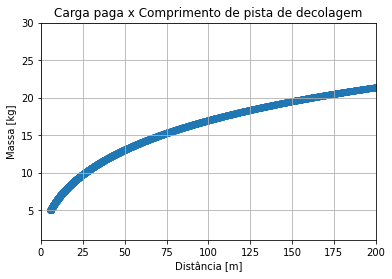

{'spreadsheetId': '1eS9TC6zEmL7uplT3cjtUptF6vf07YBkXGnr-8jg_Urs',
 'updatedCells': 10005,
 'updatedColumns': 5,
 'updatedRange': 'Decolagem!A1:E2001',
 'updatedRows': 2001}

In [ ]:
dist = np.array([])
mass = np.array([])
mtow = np.array([])
veloDec = np.array([])
tempoDec = np.array([])
tracaoDec = np.array([])

V=0
massa = 25
L=0
while (massa>5):
    V=0
    W = g*massa
    L=0
    D=0
    A=0
    R=0
    T=0
    space=0
    time=0
    Vstol = math.sqrt((2*W)/(dens*S*CLmax))
    Vdec = Vstol*1.2*0.808
    #Vdec = Vstol*1.2*0.765
    V = Vdec
    Tracao_disponivel_SJC = lin_reg_2.predict(poly_reg.fit_transform([[V]]))
    T = float(Tracao_disponivel_SJC[[0]])*(dens/1.225)
    D = (0.5*dens*(V**2)*CDge*S)
    L = (0.5*dens*(V**2)*CL*S)
    R = (W-L)*mi
    A = (T-R-D)/massa
    time = (V*massa)/(T-D-R)
    space = (A*time*time)/2
    if (space > 49.1 and space<49.5):
        mtowDSJC = W
        print("---------------")
        print("O MTOW real é: "+str(W)+"N")
        print("Dist: "+str(space)+"m")
        print("Massa: "+str(massa)+"kg") 
        print("Tempo: "+str(time)+"s")
        print("Vdec: "+str(Vstol*1.2)+"m/s") 
        print("Tração: "+str(T)+"N")
        print("---------------")
    dist = np.append(dist, [space])
    mass = np.append(mass, [massa])
    mtow = np.append(mtow, [W])
    veloDec = np.append(veloDec, [V])
    tempoDec = np.append(tempoDec, [time])
    tracaoDec = np.append(tracaoDec, [T])
    massa = massa - 0.01

plt.scatter(dist, mass)
plt.axis([0, 200, 1, 30])
plt.title("Carga paga x Comprimento de pista de decolagem")
plt.grid()
plt.xlabel("Distância [m]")
plt.ylabel("Massa [kg]")
plt.show()

df_mtow_x_distDec = pd.DataFrame()

df_mtow_x_distDec['MTOW [N]'] = mtow
df_mtow_x_distDec['Distância [m]'] = dist
df_mtow_x_distDec['Velocidade [m/s]'] = veloDec
df_mtow_x_distDec['Tempo [s]'] = tempoDec
df_mtow_x_distDec['Tração disponível [N]'] = tracaoDec

planilha_PA = gc.open('PA_v_3_0')
planilha_PA_aba_0 = gc.open('PA_v_3_0').get_worksheet(0)
planilha_PA_aba_0.update([df_mtow_x_distDec.columns.values.tolist()] + df_mtow_x_distDec.values.tolist())    

TRAÇÃO REVERSA E DESEMPENHO DE POUSO
---

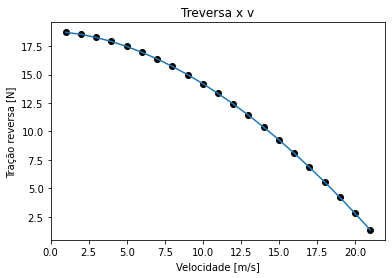

In [ ]:
datasetRev = pd.read_csv('Treversa - 16x8.csv')

vRev = np.array(datasetRev.iloc[:, 0])
vRev = vRev.reshape(-1,1)
TRev = np.array(datasetRev.iloc[:, 2])

TRev = TRev.reshape(-1, 1)

poly_regRev = PolynomialFeatures(degree = 5)
v_polyRev = poly_regRev.fit_transform(vRev)
lin_reg_Rev = LinearRegression()
lin_reg_Rev.fit(v_polyRev, TRev)

plt.scatter(vRev, TRev, color = 'black')
plt.plot(vRev, lin_reg_Rev.predict(poly_regRev.fit_transform(vRev)))
plt.title('Treversa x v')
plt.ylabel('Tração reversa [N]')
plt.xlabel('Velocidade [m/s]')
plt.show()

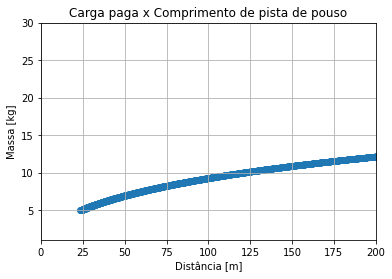

{'spreadsheetId': '1eS9TC6zEmL7uplT3cjtUptF6vf07YBkXGnr-8jg_Urs',
 'updatedCells': 12505,
 'updatedColumns': 5,
 'updatedRange': 'Pouso!A1:E2501',
 'updatedRows': 2501}

In [ ]:
#POUSO SEM MANOBRA (DE PILOTAGEM) DE ARREDONDAMENTO E COM TRAÇÃO REVERSA

distP1 = np.array([])
massP1 = np.array([])
mtowP1 = np.array([])
tempoP1 = np.array([])
veloAproxP1 = np.array([])
acelMediaP1 = np.array([])

CDge = CD*phi

massa = 30
while (massa>5):
    V=0
    W = g*massa
    L=0
    D=0
    A=0
    R=0
    spaceP=0
    timeP=0
    Vstol = math.sqrt((2*W)/(dens*S*CLmax))
    V = Vstol*1.3
    D = (0.5*dens*((V*0.7)**2)*CDge*S)
    L = (0.5*dens*((V*0.7)**2)*CLmax*S)
    Tracao_reversa_SJC = lin_reg_Rev.predict(poly_regRev.fit_transform([[V]]))
    Trev_SJC = float(Tracao_reversa_SJC)
    Trev_SJC = Trev_SJC*(dens/1.225)
    R = (W-L)*mi
    A = (D+R+Trev_SJC)/massa
    time = (V*massa)/(D+R+Trev_SJC)
    spaceP = (A*time*time)/2

    if (W == mtowDSJC):
      print("Comprimento de pista de pouso para MTOW: "+str(spaceP)+"m")

    distP1 = np.append(distP1, [spaceP])
    massP1 = np.append(massP1, [massa])
    mtowP1 = np.append(mtowP1, [W])
    tempoP1 = np.append(tempoP1, [time])
    veloAproxP1 = np.append([veloAproxP1], V)
    acelMediaP1 = np.append([acelMediaP1], A)

    massa = massa - 0.01

plt.scatter(distP1, massP1)
plt.axis([0, 200, 1, 30])
plt.title("Carga paga x Comprimento de pista de pouso")
plt.grid()
plt.xlabel("Distância [m]")
plt.ylabel("Massa [kg]")
plt.show()

df_mtow_x_distP = pd.DataFrame()
df_mtow_x_distP['Distância [m]'] = distP1
df_mtow_x_distP['MTOW [W]'] = mtowP1
df_mtow_x_distP['Tempo [s]'] = tempoP1
df_mtow_x_distP['Vaprox [m/s]'] = veloAproxP1
df_mtow_x_distP['aceleração média [m/s^2]'] = acelMediaP1

planilha_PA_aba_1 = gc.open('PA_v_3_0').get_worksheet(1)
planilha_PA_aba_1.update([df_mtow_x_distP.columns.values.tolist()] + df_mtow_x_distP.values.tolist())

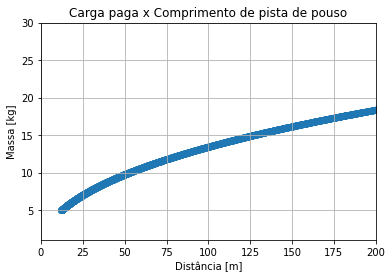

{'spreadsheetId': '1eS9TC6zEmL7uplT3cjtUptF6vf07YBkXGnr-8jg_Urs',
 'updatedCells': 27511,
 'updatedColumns': 11,
 'updatedRange': 'Pouso!A1:K2501',
 'updatedRows': 2501}

In [ ]:
#POUSO COM MANOBRA (DE PILOTAGEM) DE ARREDONDAMENTO E COM TRAÇÃO REVERSA

distP2 = np.array([])
massP2 = np.array([])
mtowP2 = np.array([])
tempoP2 = np.array([])
veloAproxP2 = np.array([])
acelMediaP2 = np.array([])
blank = np.array([])

massa = 30
while (massa>5):
    V=0
    W = g*massa
    L=0
    D=0
    A=0
    R=0
    spaceP=0
    timeP=0
    Vstol = math.sqrt((2*W)/(dens*S*CLmax))
    V = Vstol  
    D = (0.5*dens*((Vstol*0.7)**2)*CDge*S)
    L = (0.5*dens*((Vstol*0.7)**2)*CL*S)
    Tracao_reversa_SJC = lin_reg_Rev.predict(poly_regRev.fit_transform([[V]]))
    Trev_SJC = float(Tracao_reversa_SJC)
    Trev_SJC = Trev_SJC*(dens/1.225)
    R = (W-L)*mi
    A = (D+R+Trev_SJC)/massa
    time = (V*massa)/(D+R+Trev_SJC)
    spaceP = (A*time*time)/2

    distP2 = np.append(distP2, [spaceP])
    massP2 = np.append(massP2, [massa])
    mtowP2 = np.append(mtowP2, [W])
    tempoP2 = np.append(tempoP2, [time])
    veloAproxP2 = np.append([veloAproxP2], V)
    acelMediaP2 = np.append([acelMediaP2], A)
    blank = np.append([blank], ["---"])

    massa = massa - 0.01

plt.scatter(distP2, massP2)
plt.axis([0, 200, 1, 30])
plt.title("Carga paga x Comprimento de pista de pouso")
plt.grid()
plt.xlabel("Distância [m]")
plt.ylabel("Massa [kg]")
plt.show()

df_mtow_x_distP['---'] = blank
df_mtow_x_distP['Distância 2 [m]'] = distP2
df_mtow_x_distP['MTOW 2 [W]'] = mtowP2
df_mtow_x_distP['Tempo 2 [s]'] = tempoP2
df_mtow_x_distP['Vaprox 2 [m/s]'] = veloAproxP2
df_mtow_x_distP['aceleração média 2 [m/s^2]'] = acelMediaP2

planilha_PA_aba_1 = gc.open('PA_v_3_0').get_worksheet(1)
planilha_PA_aba_1.update([df_mtow_x_distP.columns.values.tolist()] + df_mtow_x_distP.values.tolist())

DESEMPENHO EM CRUZEIRO
---

In [ ]:
W = mtowDSJC 
v_array = np.array([])
Pd_array = np.array([])
Tdd_SJC = Tdd*(dens/1.225)
Tr_array = np.array([])
CL_array = np.array([])
CD_array = np.array([])
D_array = np.array([])
Pr_array = np.array([])

In [ ]:
i=1
while float(v[i]) < 40:
    Pd = Tdd_SJC[i] * v[i]
    Pd_array = np.append(Pd_array, [Pd])
    CL = (2*W)/(dens*S*(float(v[i])**2))
    CL_array = np.append(CL_array, [CL])
    CD_poly = float(lin_reg_polar.predict(poly_reg1.fit_transform([[CL]])))
    CD_array = np.append(CD_array, [CD_poly])
    D = dens*0.5*S*(float(v[i])**2)*CD_poly
    D_array  = np.append(D_array, [D])
    Tr = (W)/(CL/CD_poly)
    Tr_array = np.append(Tr_array, [Tr])
    Pr = Tr*float(v[i])
    Pr_array = np.append(Pr_array, [Pr])
    v_array = np.append(v_array, [v[i]])
    i = i + 1

In [ ]:
v_series = pd.Series(v_array)
Td_series = Tdd_SJC[1:39]
Pd_series = pd.Series(Pd_array)
Tr_series = pd.Series(Tr_array)
CL_series = pd.Series(CL_array)
CD_series = pd.Series(CD_array)
D_series = pd.Series(D_array)
Pr_series = pd.Series(Pr_array)

df_cruz = pd.DataFrame()
df_cruz['v [m/s]'] = v_series
df_cruz['Td [N]'] = Td_series
df_cruz['Pd [W]'] = Pd_series
df_cruz['Pr [W]'] = Pr_series
df_cruz['Tr [N]'] = Tr_series
df_cruz['CL'] = CL_series
df_cruz['CD'] = CD_series
df_cruz['D [N]'] = D_series
df_cruz['Pr [W]'] = Pr_series

df_cruz.fillna('', inplace=True)

planilha_PA_aba_2 = gc.open('PA_v_3_0').get_worksheet(2)
planilha_PA_aba_2.update([df_cruz.columns.values.tolist()] + df_cruz.values.tolist())    

{'spreadsheetId': '1eS9TC6zEmL7uplT3cjtUptF6vf07YBkXGnr-8jg_Urs',
 'updatedCells': 312,
 'updatedColumns': 8,
 'updatedRange': 'Cruzeiro!A1:H39',
 'updatedRows': 39}

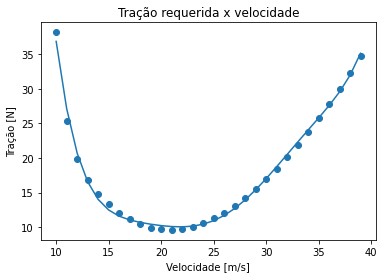

In [ ]:
Tr_array_right = Tr_array[8:]
v_array_right = v_array[8:]
Tr_array_right = Tr_array_right.reshape(-1,1)
v_array_right = v_array_right.reshape(-1,1)

poly_reg2 = PolynomialFeatures(degree =6 )
trac_req_poly = poly_reg2.fit_transform(v_array_right)
lin_reg_req = LinearRegression()
lin_reg_req.fit(trac_req_poly, Tr_array_right)

plt.scatter(v_array_right, Tr_array_right)
plt.plot(v_array_right, lin_reg_req.predict(poly_reg2.fit_transform(v_array_right)))
plt.title('Tração requerida x velocidade')
plt.ylabel('Tração [N]')
plt.xlabel('Velocidade [m/s]')
plt.show()

In [ ]:
#Vamos agora fazer predições usando as regressões e encontrar as velocidades com predições quase idênticas
velo_specificas = np.array([])
amostra_velo = 5
Tr_min_SJC = 1000

while (amostra_velo < 40):

  trac_disp_pred = lin_reg_2.predict(poly_reg.fit_transform([[amostra_velo]]))
  trac_req_pred = lin_reg_req.predict(poly_reg2.fit_transform([[amostra_velo]]))

  if float(trac_req_pred) < Tr_min_SJC:
    Tr_min_SJC = float(trac_req_pred)
    V_Tr_min_SJC = amostra_velo

  compar = trac_disp_pred[[0]] - trac_req_pred[[0]]
  
  if (compar[[0]] < 0.01 and compar[[0]] > 0):
    velo_specificas = np.append(velo_specificas, [amostra_velo])
    
  amostra_velo += 0.0001

print(colored("A velocidade de "+str(V_Tr_min_SJC)+"m/s é a de menor tração requerida para São José dos Campos", 'yellow'))
print(colored("A velocidade de "+str(velo_specificas[0])+"m/s é a mínima para São José dos Campos", 'magenta'))
print(colored("A velocidade de "+str(velo_specificas[-1])+"m/s é a máxima para São José dos Campos", "cyan"))
  

A velocidade de 21.84589999996074m/s é a de menor tração requerida para São José dos Campos
A velocidade de 10.198599999987884m/s é a mínima para São José dos Campos
A velocidade de 24.480999999954598m/s é a máxima para São José dos Campos


In [ ]:
Vstol = math.sqrt((2*W)/(dens*S*CLmax))                     
print(colored("Velocidade de estol: "+str(Vstol)+"m/s", "magenta"))

Vcru = 0.9*velo_specificas[-1]
print(colored("Velocidade de cruzeiro: "+str(Vcru)+"m/s", "yellow"))

Vmer = 1.25*velo_specificas[-1]
print(colored("Velocidade de mergulho: "+str(Vmer)+"m/s", "red"))

dict_velos = {"V. de estol" : Vstol}
dict_velos["V. mínima (se for maior q a de estol)"] = velo_specificas[0]
dict_velos["V. máxima"] = velo_specificas[-1]
dict_velos["V. de cruzeiro"] = Vcru
dict_velos["V. de mergulho"] = Vmer

Velocidade de estol: 13.71611655239964m/s
Velocidade de cruzeiro: 22.032899999959138m/s
Velocidade de mergulho: 30.60124999994325m/s


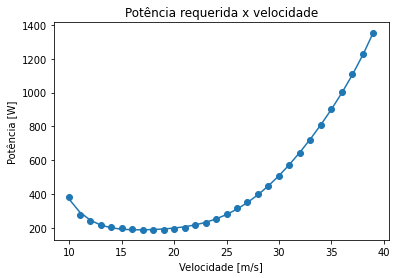

In [ ]:
Pr_array_right = Pr_array[8:]
v_array_right = v_array[8:]
Pr_array_right = Pr_array_right.reshape(-1,1)
v_array_right = v_array_right.reshape(-1,1)

poly_regPR = PolynomialFeatures(degree =6 )
pot_req_poly = poly_regPR.fit_transform(v_array_right)
lin_reg_PR = LinearRegression()
lin_reg_PR.fit(pot_req_poly, Pr_array_right)

plt.scatter(v_array_right, Pr_array_right)
plt.plot(v_array_right, lin_reg_PR.predict(poly_regPR.fit_transform(v_array_right)))
plt.title('Potência requerida x velocidade')
plt.ylabel('Potência [W]')
plt.xlabel('Velocidade [m/s]')
plt.show()

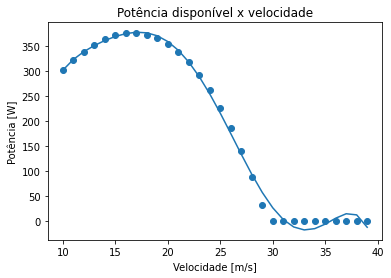

In [ ]:
Pd_array_right = Pd_array[8:]
v_array_right = v_array[8:]
Pd_array_right = Pd_array_right.reshape(-1,1)
v_array_right = v_array_right.reshape(-1,1)

poly_regPD = PolynomialFeatures(degree =6 )
pot_disp_poly = poly_regPD.fit_transform(v_array_right)
lin_reg_PD = LinearRegression()
lin_reg_PD.fit(pot_disp_poly, Pd_array_right)

plt.scatter(v_array_right, Pd_array_right)
plt.plot(v_array_right, lin_reg_PD.predict(poly_regPD.fit_transform(v_array_right)))
plt.title('Potência disponível x velocidade')
plt.ylabel('Potência [W]')
plt.xlabel('Velocidade [m/s]')
plt.show()

In [ ]:
velo_specificas = np.array([])
amostra_velo = 5
Pr_min_SJC = 1000

while (amostra_velo < 40):
  #fazendo predições para a tração requerida no range de velocidades entre 5 e 30 m/s
  pot_disp_pred = lin_reg_PD.predict(poly_regPD.fit_transform([[amostra_velo]]))
  #print(trac_disp_pred[[0]]) #--->flag
  #fazendo predições para a tração requerida no range de velocidades entre 5 e 30 m/s
  pot_req_pred = lin_reg_PR.predict(poly_regPR.fit_transform([[amostra_velo]]))
  if float(pot_req_pred) < Pr_min_SJC:
    Pr_min_SJC = float(pot_req_pred)
    V_Pr_min_SJC = amostra_velo

  #print(trac_req_pred[[0]])  #--->flag

  compar = pot_disp_pred[[0]] - pot_req_pred[[0]]
  #print (colored(compar, 'blue'))   #--->flag
  
  if (compar[[0]] < 0.01 and compar[[0]] > 0):
    velo_specificas = np.append(velo_specificas, [amostra_velo])
  amostra_velo += 0.001

print(colored("A velocidade de "+str(V_Pr_min_SJC)+"m/s é a de menor potência requerida para São José dos Campos", 'yellow'))

A velocidade de 16.641999999997353m/s é a de menor potência requerida para São José dos Campos


In [ ]:
#CÁUCULO DO TEMPO DO VOO DE CRUZEIRO(VOO RETO E NIVELADO)

tcru = hcru/Vcru
print("Tempo de cruzeiro: "+str(tcru)+"s")

Tempo de cruzeiro: 36.30933740004646s


DESEMPENHO EM SUBIDA
---

In [ ]:
df_climb = df_cruz.filter(['v [m/s]', 'Pd [W]', 'Pr [W]'], axis=1)
df_climb = df_climb.replace(r'^\s*$', np.nan, regex=True)
print(df_climb)

    v [m/s]      Pd [W]        Pr [W]
0       2.0   69.892365  3.129733e+07
1       3.0  103.946517  1.832560e+06
2       4.0  137.034084  2.412001e+05
3       5.0  168.906841  4.874695e+04
4       6.0  199.325334  1.277405e+04
5       7.0  228.064145  4.009529e+03
6       8.0  254.897852  1.479303e+03
7       9.0  279.615947  6.640650e+02
8      10.0  302.009677  3.818179e+02
9      11.0  321.867656  2.784764e+02
10     12.0  338.992531  2.376391e+02
11     13.0  353.193967  2.188544e+02
12     14.0  364.276368  2.078741e+02
13     15.0  372.034487  1.999514e+02
14     16.0  376.305181  1.938561e+02
15     17.0  376.876185  1.896342e+02
16     18.0  373.579094  1.877503e+02
17     19.0  366.235852  1.887620e+02
18     20.0  354.654371  1.932034e+02
19     21.0  338.679399  2.015514e+02
20     22.0  318.104814  2.142222e+02
21     23.0  292.781506  2.315797e+02
22     24.0  262.525280  2.539449e+02
23     25.0  227.173869  2.816059e+02
24     26.0  186.545708  3.148260e+02
25     27.0 

    v [m/s]      Pd [W]  ...  Angulo de subida [rad]   Vh [m/s]
0       2.0   69.892365  ...                     NaN   0.000000
1       3.0  103.946517  ...                     NaN   0.000000
2       4.0  137.034084  ...                     NaN   0.000000
3       5.0  168.906841  ...                     NaN   0.000000
4       6.0  199.325334  ...                     NaN   0.000000
5       7.0  228.064145  ...                     NaN   0.000000
6       8.0  254.897852  ...                     NaN   0.000000
7       9.0  279.615947  ...                     NaN   0.000000
8      10.0  302.009677  ...               -0.062878   9.980239
9      11.0  321.867656  ...                0.031063  10.994693
10     12.0  338.992531  ...                0.066549  11.973437
11     13.0  353.193967  ...                0.081452  12.956900
12     14.0  364.276368  ...                0.088072  13.945738
13     15.0  372.034487  ...                0.090449  14.938685
14     16.0  376.305181  ...            

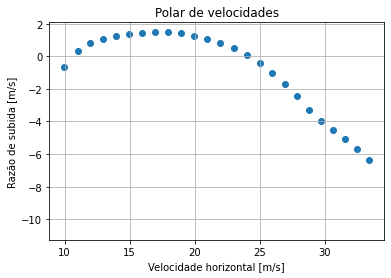

{'spreadsheetId': '1eS9TC6zEmL7uplT3cjtUptF6vf07YBkXGnr-8jg_Urs',
 'updatedCells': 273,
 'updatedColumns': 7,
 'updatedRange': 'Subida!A1:G39',
 'updatedRows': 39}

In [ ]:
#Transformando em Numpy arrays as duas colunas do dataframe da subida pra poder fazer operações matemáticas com os valores delas
#Provavelmente tem um jeito de iterar sobre os valores do dataframe sem transformar as colunas em numpy arrays porém foi implementado assim por enquanto
Pd_O_array = np.array(df_climb[['Pd [W]']].values)
Pr_array = np.array(df_climb[['Pr [W]']].values)
v_array = np.array(df_climb['v [m/s]'].values)

#Calculando a sobra de potência fazendo Potencia disponível subtraida da Potência Requerida
Delta_pot = np.array([None]*38)
i=37
while i>7:
  Delta_pot[i] = float(Pd_O_array[i]) - float(Pr_array[i])
  i = i - 1
df_climb['Sobra de potência [W]'] = Delta_pot
#print(df_climb)

#Calculando a razão de subida a partir da sobra de potência e do MTOW da aeronave
R_C = np.array([None]*38)
i = 37
while i>7:
  R_C[i] = Delta_pot[i]/mtowDSJC
  i = i - 1
df_climb['Rate of Climb [m/s]'] = R_C
#print(df_climb)

#Calculando o ângulo de subida da aeronave para diferentes velocidades de subida
#Comecei a fazer os WHILE ao contrário agora pq parece q dá pra ter um controle melhor, q nem aq eu pcisava começar os calculo a partir do quarto valor
#de razão de subida pq dá alguma merda no valor, algo de a função math.asin() não suportar o input que você fornece, até dá pau no Excel tbm se fizer isso
Angulo_subida = np.array([None]*38)
i=8
while i<33:
  Angulo_subida[i] = math.asin(float(R_C[i])/float(v_array[i])) 
  i = i + 1
df_climb['Angulo de subida [rad]'] = Angulo_subida
#print(df_climb)

#Substituindo os valores None do dataframe com NaN, pq o NaN é meio considerado como número mas o None é realmente nada, aí quando fui fazer o cosseno
#do angulo deu bosta

df_climb = df_climb.fillna(value=np.nan)
Angulo_subida = np.array(df_climb['Angulo de subida [rad]'])
#aí dps disso eu aplico a função map(), que recebe como parâmetros a função q vc quer aplicar e um grupo de valores q vc quer aplicar essa função
#fiz isso porque quando fui fazer o caraio do cosseno nos angulo deu ruim, acho q o math.cos() so aceita valores unitarios como input, algo do tipo, nem entendi mt bem
Cos_Angulo_Subida = np.array(list(map(math.cos, Angulo_subida)))

#Calculando a velocidade horizontal da aeronave durante a sua subida para diferentes angulos

Velo_h_climb = np.array([None]*38)
i = 8
while i<37:
  Velo_h_climb[i] = float(v_array[i])*float(Cos_Angulo_Subida[i])
  i = i + 1
df_climb['Vh [m/s]'] = Velo_h_climb

df_climb['Vh [m/s]'] = df_climb['Vh [m/s]'].fillna(0)

Velo_h_climb_1 = np.array(df_climb['Vh [m/s]'])
Velo_h_climb_max = np.max(Velo_h_climb_1)

#print(df_climb)

print(df_climb)
plt.scatter(Velo_h_climb, R_C)
plt.ylabel("Razão de subida [m/s]")
plt.xlabel("Velocidade horizontal [m/s]")
plt.title("Polar de velocidades")
plt.grid()
plt.show()

df_climb = df_climb.fillna(value=np.nan)
df_climb.fillna('', inplace=True)
planilha_PA_aba_3 = gc.open('PA_v_3_0').get_worksheet(3)
planilha_PA_aba_3.update([df_climb.columns.values.tolist()] + df_climb.values.tolist())   

In [ ]:
print(Angulo_subida)

[        nan         nan         nan         nan         nan         nan
         nan         nan -0.06287759  0.03106288  0.06654873  0.08145226
  0.08807218  0.0904485   0.08990191  0.08682847  0.0813733   0.07360973
  0.06360124  0.05143521  0.03718623  0.02095223  0.00281487 -0.01714345
 -0.03885598 -0.06227326 -0.08735038 -0.11398512 -0.1337205  -0.14590919
 -0.15907016 -0.17317395 -0.18819638         nan         nan         nan
         nan         nan]


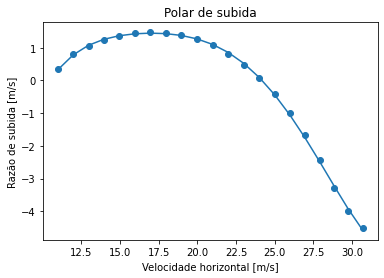

In [ ]:
RC_right = R_C[9:30]
RC_right = RC_right.reshape(-1,1)
Velo_h_climb_right = Velo_h_climb[9:30]
Velo_h_climb_right = Velo_h_climb_right.reshape(-1, 1)

poly_reg7 = PolynomialFeatures(degree = 5)
vh_poly7 = poly_reg7.fit_transform(Velo_h_climb_right)
lin_reg_7 = LinearRegression()
lin_reg_7.fit(vh_poly7, RC_right)

plt.scatter(Velo_h_climb_right, RC_right)
plt.plot(Velo_h_climb_right, lin_reg_7.predict(poly_reg7.fit_transform(Velo_h_climb_right)))
plt.title('Polar de subida')
plt.ylabel('Razão de subida [m/s]')
plt.xlabel('Velocidade horizontal [m/s]')
plt.show()

In [ ]:
amostra_velo = 9
RC_max = 0
RC_temp = 0
Vh_RCmax = 0
ang_RCmax = 0

while (amostra_velo < Velo_h_climb_max and amostra_velo>0):
  RC_pred7 = lin_reg_7.predict(poly_reg7.fit_transform([[amostra_velo]])) 
  RC_temp = RC_pred7
  if (RC_temp > RC_max and RC_temp>0):
    RC_max = RC_temp
    Vh_RCmax = amostra_velo
  amostra_velo += 0.001
ang_RCmax = math.atan(float(RC_max)/(Vh_RCmax))
ang_RCmax_deg = ang_RCmax * (180/3.14)

print(colored("Razão de subida máxima: "+str(float(RC_max))+"m/s", 'cyan'))
print(colored("Vh para máxima RC: "+str(float(Vh_RCmax))+"m/s", 'magenta'))
print(colored("Angulo para máxima RC: "+str(float(ang_RCmax_deg))+" graus", 'red'))

Razão de subida máxima: 1.4470913159590992m/s
Vh para máxima RC: 17.028999999997378m/s
Angulo para máxima RC: 4.859678287865177 graus


In [ ]:
#CÁLCULO DO TEMPO DE SUBIDA CONFORME ALTURA ESPECIFICADA NOS INPUTS

tclimb = hclimb/RC_max
print("Tempo de subida: "+str(float(tclimb))+"s")

Tempo de subida: 41.46248363064315s


DESEMPENHO EM DESCIDA
---

       CL        CD  ...  Velocidade horizontal [m/s]  Razão de desicda [m/s]
0    0.20  0.041306  ...                    24.148086                4.987315
1    0.21  0.040541  ...                    23.657841                4.567157
2    0.22  0.039828  ...                    23.189305                4.198116
3    0.23  0.039168  ...                    22.741943                3.872839
4    0.24  0.038559  ...                    22.314978                3.585198
..    ...       ...  ...                          ...                     ...
165  1.85  0.314870  ...                     8.018919                1.364820
166  1.86  0.318891  ...                     7.994853                1.370690
167  1.87  0.322969  ...                     7.970921                1.376664
168  1.88  0.327107  ...                     7.947120                1.382744
169  1.89  0.331305  ...                     7.923448                1.388932

[170 rows x 7 columns]


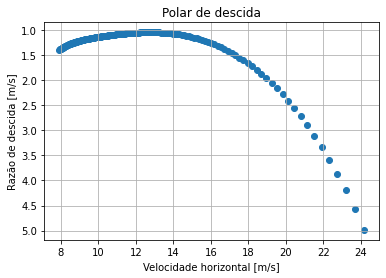


O ângulo mínimo com que se pode realizar o voo de planeio é: 4.319982360704852graus



{'spreadsheetId': '1eS9TC6zEmL7uplT3cjtUptF6vf07YBkXGnr-8jg_Urs',
 'updatedCells': 1197,
 'updatedColumns': 7,
 'updatedRange': 'Descida!A1:G171',
 'updatedRows': 171}

In [ ]:
CL_desc_array_SJC = np.array([])
CD_desc_array_SJC = np.array([])
Eff_aero_desc_array_SJC = np.array([])
Angulo_planeio_array_SJC = np.array([])
Velo_planeio_array_SJC = np.array([])
Velo_h_planeio_array_SJC = np.array([])
R_D_array_SJC = np.array([])

anguloMinimo = 40

CL = 0.2
while CL < 1.9:
  CD_poly = float(lin_reg_polar.predict(poly_reg1.fit_transform([[CL]])))
  Eff_SJC = CL/CD_poly
  Ang_planeio_SJC = math.atan(1/Eff_SJC)

  if (Ang_planeio_SJC < anguloMinimo):
    anguloMinimo = Ang_planeio_SJC

  Velo_planeio_SJC = math.sqrt((W*math.cos(Ang_planeio_SJC))/(dens*S*CL))
  Velo_h_planeio_SJC = Velo_planeio_SJC*math.cos(Ang_planeio_SJC)
  R_D_SJC = Velo_planeio_SJC*math.sin(Ang_planeio_SJC)

  CL_desc_array_SJC = np.append(CL_desc_array_SJC, [CL])
  CD_desc_array_SJC = np.append(CD_desc_array_SJC, [CD_poly])
  Eff_aero_desc_array_SJC = np.append(Eff_aero_desc_array_SJC, [Eff_SJC])
  Angulo_planeio_array_SJC = np.append(Angulo_planeio_array_SJC, [Ang_planeio_SJC])
  Velo_planeio_array_SJC = np.append(Velo_planeio_array_SJC, [Velo_planeio_SJC])
  Velo_h_planeio_array_SJC = np.append(Velo_h_planeio_array_SJC, [Velo_h_planeio_SJC])
  R_D_array_SJC = np.append(R_D_array_SJC, [R_D_SJC])

  CL = CL + 0.01

df_descent = pd.DataFrame({"CL":CL_desc_array_SJC, "CD":CD_desc_array_SJC, "Eficiência aerodinâmica":Eff_aero_desc_array_SJC, "Angulo de descida [deg]":Angulo_planeio_array_SJC, "Velocidade de planeio [m/s]":Velo_planeio_array_SJC, "Velocidade horizontal [m/s]":Velo_h_planeio_array_SJC, "Razão de desicda [m/s]":R_D_array_SJC})
print(df_descent)

plt.scatter(Velo_h_planeio_array_SJC, R_D_array_SJC)
plt.xlabel("Velocidade horizontal [m/s]")
plt.ylabel("Razão de descida [m/s]")
plt.gca().invert_yaxis()
plt.title("Polar de descida")
plt.grid()
plt.show()

anguloMinimo = anguloMinimo*(180/3.1415)
print(colored("\nO ângulo mínimo com que se pode realizar o voo de planeio é: "+str(anguloMinimo)+"graus\n", 'red'))

planilha_PA_aba_4 = gc.open('PA_v_3_0').get_worksheet(4)
planilha_PA_aba_4.update([df_descent.columns.values.tolist()] + df_descent.values.tolist())    

DESEMPENHO EM CURVA
---

In [ ]:
#Encontrar o raio mínimo para realização de uma curva fora da região de estoL
pi = 3.14159
E = 0.924837176
Eo = 0.693627882
AR = 2.812939522
CDo = 0.00715
#Calcular o valor de tração disponível máxima para a velocidade de estol
Vstol = math.sqrt((2*W)/((dens*S*CLmax)))
Tdd_stall = lin_reg_2.predict(poly_reg.fit_transform([[Vstol]]))
Tdd_stall = float(Tdd_stall)
Tdd_stall = Tdd_stall*(dens/1.225)
print("Tração disponível dinâmmica para velocidade de estol: "+str((Tdd_stall))+"m/s")
#Calcular relação T/W
T_W = Tdd_stall/W
#Calcular carga alar W/S
Alar = W/S
#Calcular velocidade de curva de raio mínimo
K = 1/(pi*Eo*AR)
print(colored("K: "+str(K), 'yellow'))
v_rmin = math.sqrt((4*K*Alar)/(dens*T_W))
print(colored("Velocidade de raio de curva mínimo: "+str(v_rmin*0.8)+"m/s", 'cyan'))
#Calcular o fator de carga para raio de curva mínimo
n_rmin = math.sqrt(2-((4*K*CDo)/(T_W**2)))
print(colored("Fator de carga para raio de curva mínimo: "+str(n_rmin), 'magenta'))
#Calcular o raio de curva mínimo
rmin = (4*K*Alar)/(dens*g*T_W*(math.sqrt((1-4*K*CDo)/(T_W**2))))
print(colored("Raio de curva mínimo: "+str(rmin)+"m", 'red'))
#Calcular o angulo para raio de curva mínimo
ang_rmin = math.acos(1/n_rmin)
print(colored("Ângulo de curva para raio mínimo: "+str(ang_rmin*180/3.14)+" graus", 'green'))

Tração disponível dinâmmica para velocidade de estol: 26.87949862951611m/s
K: 0.16314116408579046
Velocidade de raio de curva mínimo: 15.653565392853336m/s
Fator de carga para raio de curva mínimo: 1.376889646796437
Raio de curva mínimo: 8.312866355430858m
Ângulo de curva para raio mínimo: 43.44704138257627 graus


Envelope de voo
---



Carga paga x altitude-densidade
---